<a href="https://colab.research.google.com/github/B-Aishwarya-2000/color/blob/main/color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install webcolors

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import cv2
import sys
import glob
import webcolors
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

In [14]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [32]:
def hex2name(c):
    h_color = '#{:02x}{:02x}{:02x}'.format(int(c[0]), int(c[1]), int(c[2]))
    try:
        nm = webcolors.hex_to_name(h_color, spec='css3')
    except ValueError as v_error:
        #print("{}".format(v_error))
        rms_lst = []
        for img_clr, img_hex in webcolors.CSS3_NAMES_TO_HEX.items():
            cur_clr = webcolors.hex_to_rgb(img_hex)
            rmse = np.sqrt(mean_squared_error(c, cur_clr))
            rms_lst.append(rmse)

        closest_color = rms_lst.index(min(rms_lst))

        nm = list(webcolors.CSS3_NAMES_TO_HEX.items())[closest_color][0]
    return nm

In [30]:
def get_colors(img,number_of_colors,show_chart):
  modified_image = img.reshape(img.shape[0]*img.shape[1], 3)
  clf = KMeans(n_clusters = number_of_colors)
  labels = clf.fit_predict(modified_image)
  #print("labels")
  counts = Counter(labels)
  #print(counts)

  center_colors = clf.cluster_centers_
  # We get ordered colors by iterating through the keys
  ordered_colors = [center_colors[i] for i in counts.keys()]
  hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
  rgb_colors = [ordered_colors[i] for i in counts.keys()]
  lbl_colors = [hex2name(ordered_colors[i]) for i in counts.keys()]
  #print(ordered_colors)

  if (show_chart):
      plt.figure(figsize = (8, 6))
      plt.pie(counts.values(), labels = lbl_colors, colors = hex_colors)

  return rgb_colors
    


In [44]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

[array([126.65463189, 103.29611512, 102.16332499]),
 array([226.78376705, 173.76895563, 135.68570446]),
 array([68.87593894, 25.05591694, 52.17997801]),
 array([181.66818379,  41.90282293, 128.01297681]),
 array([174.83729208,  52.23295148,  34.43205402])]

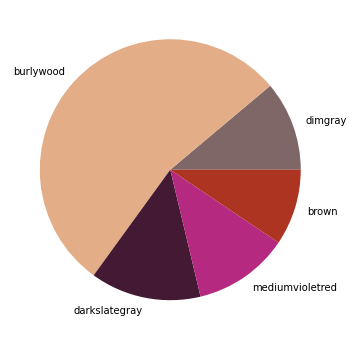

In [45]:
get_colors(get_image('/content/rangoli.jpg'), 5, True)